<a href="https://colab.research.google.com/github/Shibu4064/EMNLP/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train = pd.read_csv('/content/drive/MyDrive/Violence Inciting Text Detection (VITD)/train.csv')
dev = pd.read_csv('/content/drive/MyDrive/Violence Inciting Text Detection (VITD)/dev.csv')
test = pd.read_csv('/content/drive/MyDrive/Violence Inciting Text Detection (VITD)/test.csv')
bbtrain = pd.read_csv('/content/drive/MyDrive/Violence Inciting Text Detection (VITD)/bbtrain.csv')
bbval = pd.read_csv('/content/drive/MyDrive/Violence Inciting Text Detection (VITD)/bbval.csv')
bbtest = pd.read_csv('/content/drive/MyDrive/Violence Inciting Text Detection (VITD)/bbtest.csv')
test.head()

,text,label
0,বাংলাদেশের হিন্দুরা নিজেদের জন্য আলাদা হিন্দু ...,0
1,মাইজদী - চৌমুহুনী - ফেনী মন্দিরে হামলা নিয়ে রি...,0
2,"দয়া করে পবিত্র কুরআনুল কারিম বলেন,,,,পবিত্র কথ...",0
3,বিবিসি হলো সত্য কে বিনষ্টকারী আর মিথ্যা কে গ্র...,1
4,বুধবার কি তোরা মারা গেছিলি বিবিসি বাংলা,1


In [4]:
bb = pd.concat([bbtrain, bbval, bbtest])
bb.groupby('sentiment').count()

,id,Book_Name,Writer_Name,Category,Rating,Review,Site,label
sentiment,,,,,,,,
negative,9674,9674,9669,9672,9674,9674,9674,9674
neutral,6804,6804,6793,6804,6804,6804,6804,6804
positive,141587,141587,141340,141550,141587,141587,141587,141587


In [5]:
test.groupby('label').count()

,text
label,
0,1096
1,719
2,201


In [6]:
vitd = pd.concat([train, dev, test])
vitd.groupby('label').count()

,text
label,
0,3202
1,2058
2,786


In [64]:
def show_bar(column, title, top=100):
  plt.figure(figsize=(20,5))
  column.sample(top).sort_index().plot(kind='bar')
  plt.title(title)
  plt.xlabel("ID")
  plt.ylabel("Count")
  plt.show()

def show_dist(column):
  plt.figure(figsize=(10,5))
  sns.histplot(
    column,
    kde=True,
    stat="density",
    kde_kws=dict(cut=3),
    alpha=.4,
    edgecolor=(1, 1, 1, .4),
  )
  locs, labels = plt.yticks()
  for l in labels:
    s = l.get_text()
    f = float(s) * 100
    f = round(f, 2)
    l.set_text(str(f))
  plt.yticks(locs, labels)
  plt.ylabel('Density (%)')
  plt.xlabel('Text Length')
  plt.show()

In [66]:
plt.rcParams['font.size'] = 24

In [8]:
train['text_lenght'] = train['text'].apply(lambda x : len(x.split()))
dev['text_lenght'] = dev['text'].apply(lambda x : len(x.split()))
test['text_lenght'] = test['text'].apply(lambda x : len(x.split()))
vitd['text_lenght'] = vitd['text'].apply(lambda x : len(x.split()))

In [9]:
# show_bar(train['text_lenght'], "Train Dataset Text Length RANDOM 100")
# show_bar(dev['text_lenght'], "Dev Dataset Text Length RANDOM 100")
# show_bar(test['text_lenght'], "Test Dataset Text Length RANDOM 100")

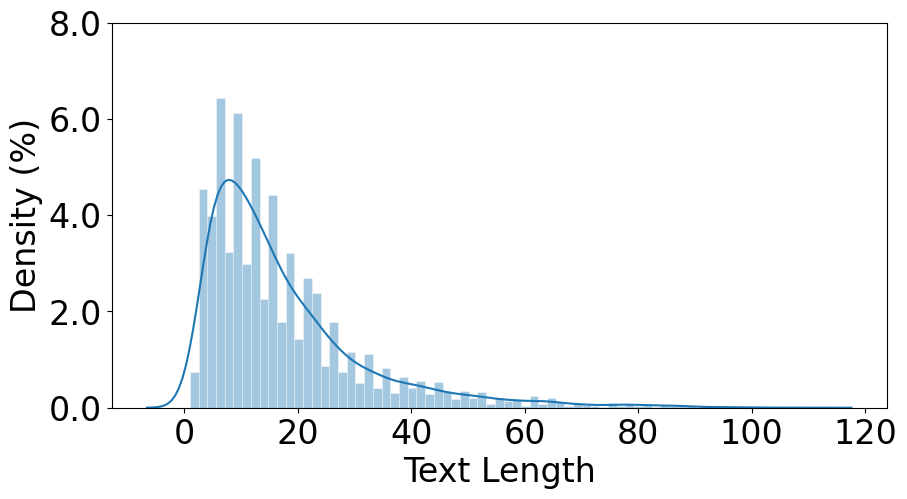

In [67]:
# show_dist(train['text_lenght'])
# show_dist(dev['text_lenght'])
# show_dist(test['text_lenght'])
show_dist(vitd['text_lenght'])

In [11]:
%%capture
!pip install wordcloud
!pip install bnlp_toolkit

In [12]:
!wget https://www.omicronlab.com/download/fonts/kalpurush.ttf

--2023-09-04 09:22:08--  https://www.omicronlab.com/download/fonts/kalpurush.ttf
Resolving www.omicronlab.com (www.omicronlab.com)... 104.21.12.234, 172.67.153.233, 2606:4700:3030::6815:cea, ...
Connecting to www.omicronlab.com (www.omicronlab.com)|104.21.12.234|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 314592 (307K) [application/octet-stream]
Saving to: ‘kalpurush.ttf.1’

kalpurush.ttf.1     100%[===================>] 307.22K   648KB/s    in 0.5s    

2023-09-04 09:22:10 (648 KB/s) - ‘kalpurush.ttf.1’ saved [314592/314592]



In [13]:
def clean(text):
    text = re.sub('[%s]' % re.escape(punctuations), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('\xa0', '', text)
    return text

In [89]:
import re
from wordcloud import WordCloud
import bnlp.corpus as cp
stopwords = cp.corpus.BengaliCorpus.stopwords
stopwords.extend(['করে', 'এই', 'কি', 'আর'])
punctuations = cp.corpus.BengaliCorpus.punctuations

def plot_world(text):

    wordcloud = WordCloud(
        width = 500,
        height = 500,
        background_color ='aqua',
        colormap='viridis',
        font_path="kalpurush.ttf",
        min_font_size = 20,
        regexp=r"[\u0980-\u09FF]+",
    ).generate(text)

    # plot the WordCloud image
    plt.figure(figsize = (5, 5), facecolor = 'cyan')
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)

    plt.show()

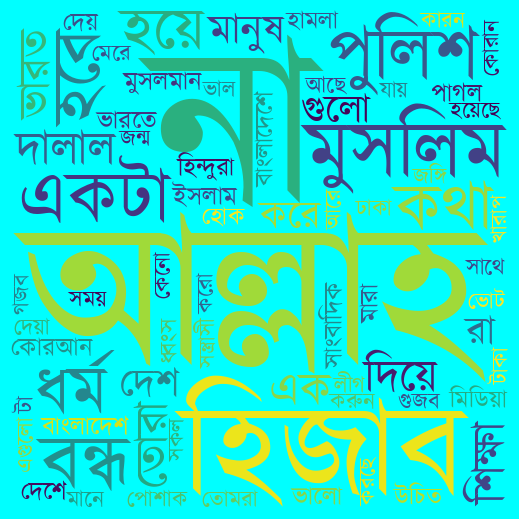

In [90]:
s = " ".join(vitd.query('label == 1 | label == 2')['text'])
for w in stopwords: s = s.replace(w + ' ', '')
s = clean(s)
plot_world(s)

In [30]:
import pandas as pd
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize

# Assume 'df' is your dataframe and 'text_column' is the column containing the sentences
# Concatenate all sentences into a single text
text = s

# Tokenize the text
tokens = word_tokenize(text)

# Calculate the term frequency of the words
fdist = FreqDist(tokens)

# Define the number of stopwords to select
n_stopwords = 100

# Select the 'n_stopwords' most frequent words as stopwords
my_stopwords = [word for word, count in fdist.most_common(n_stopwords)]
print(my_stopwords)

['না', 'হিজাব', 'আল্লাহ', 'বন্ধ', 'মুসলিম', 'পুলিশ', 'দালাল', 'একটা', 'ধর্ম', 'ইসলাম', 'হয়ে', 'হবে', 'শিক্ষা', 'কথা', 'ভারত', 'দিয়ে', 'তোরা', 'কোরআন', 'দেশ', 'এক', 'সাংবাদিক', 'মানুষ', 'লীগ', 'ঢাকা', 'মিডিয়া', 'যায়', 'গুলো', 'রা', 'করে', 'ভারতে', 'মুসলমান', 'বাংলাদেশ', 'বাংলাদেশে', 'পাগল', 'মারা', 'কলেজ', 'দেশে', 'হামলা', 'হিন্দুরা', 'ভালো', 'দেয়', 'টা', 'গজব', 'ধ্বংস', 'আওয়ামী', 'উচিত', 'সময়', 'হোক', 'সাথে', 'করুন', 'পোশাক', 'হয়েছে', 'দেয়া', 'তোমরা', 'মত', 'মেরে', 'করো', 'সকল', 'স্কুল', 'জন্ম', 'আছে', 'কারন', 'কেনো', 'ভোট', 'কোরান', 'বড়', 'মার্কেট', 'এগুলো', 'মানে', 'সন্ত্রাসী', 'খারাপ', 'গুজব', 'যুদ্ধ', 'আওয়ামী', 'কুরআন', 'ভাল', 'আরে', 'ধন্যবাদ', 'টাকা', 'নাটক', 'করছে', 'পড়ে', 'জঙ্গি', 'পরা', 'আল্লাহগজব', 'থাকতে', 'নোংরা', 'ছি', 'কখনো', 'নিউমার্কেট', 'গেছে', 'ছাত্রলীগ', 'আসবে', 'আপনারা', 'ইনশাআল্লাহ', 'চায়', 'আশা', 'করুক', 'ছাড়া', 'টিভি']


In [92]:
vitd.describe()

,label,text_lenght
count,6046.000000,6046.00000
mean,0.600397,17.51042
std,0.707114,14.40357
min,0.000000,1.00000
25%,0.000000,8.00000
50%,0.000000,13.00000
75%,1.000000,22.00000
max,2.000000,110.00000
